In [10]:
import torch
import os
from torch_geometric.datasets import TUDataset, Planetoid
from torch_geometric.loader import DataLoader


name = "MUTAG"
path='../data'
train_size = 10
test_size = 50
batch_size = 32


dataset = TUDataset(os.path.join(path, 'TUDataset'), name=name)
torch.manual_seed(1712)
dataset = dataset.shuffle()

if train_size and test_size:
    train_dataset = dataset[:train_size]
    test_dataset = dataset[train_size:train_size + test_size]
else:
    train_dataset = dataset[:int(0.8 * len(dataset))]
    test_dataset = dataset[int(0.8 * len(dataset)):]
    
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

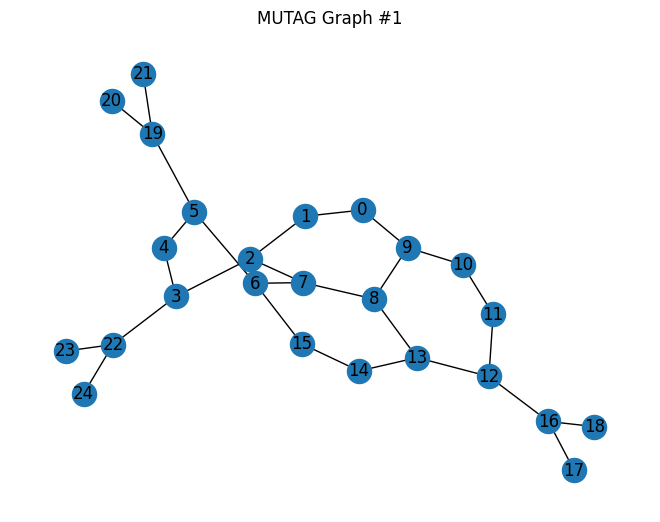

In [34]:
import os
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

# 2. Pick one example (e.g. the first)
data = dataset[0]

# 3. Convert to a NetworkX graph
G = to_networkx(data, to_undirected=True)

# 4. Plot it
plt.figure()
nx.draw(G, with_labels=True)
plt.title("MUTAG Graph #1")
plt.show()

In [11]:
dataset[0]

Data(edge_index=[2, 56], x=[25, 7], edge_attr=[56, 4], y=[1])

In [12]:
print(f"Node features: {dataset[0].x[:2]}")
print(f"Edage attribute: {dataset[0].edge_attr[:2]}")

Node features: tensor([[1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]])
Edage attribute: tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.]])


In [13]:
from torch_geometric.utils import degree

# Get max degree over all graphs
max_deg = 0
for data in dataset:
    deg = degree(data.edge_index[0], num_nodes=data.num_nodes)
    max_deg = max(max_deg, int(deg.max()))

print(f"Maximum degree: {max_deg}")

Maximum degree: 4


In [27]:
edge_index = dataset[0].edge_index.t()
num_nodes = dataset.x.size(0)
num_nodes_model = 5
num_edges_model = num_nodes_model - 1

In [28]:
adj_mtx = torch.zeros((num_nodes, num_nodes), dtype=torch.int)
adj_mtx[edge_index[:, 0], edge_index[:, 1]] = 1
adj_mtx[edge_index[:, 1], edge_index[:, 0]] = 1

In [29]:
from utils import star_subgraph
subgraphs = star_subgraph(adj_mtx.cpu().numpy(), subgraph_size=num_nodes_model)
print(f"Subgraph size: {subgraphs[0]}")

Subgraph size: [2682]


In [30]:
largest = max(subgraphs, key=len)
print(f"Largest subgraph (size {len(largest)}): {largest}")

Largest subgraph (size 4): [7, 2, 6, 8]


In [32]:
print(dataset.edge_index.t())

tensor([[   0,    1],
        [   0,    9],
        [   1,    0],
        ...,
        [3368, 3370],
        [3369, 3368],
        [3370, 3368]])
